In [1]:
from google.colab import files
uploaded = files.upload()
print(files._upload_files)

Saving historical_data.csv to historical_data.csv
<function _upload_files at 0x7b1e19d09e40>


In [3]:
from google.colab import files
uploaded = files.upload()
print(files._upload_files)

Saving fear_greed_index.csv to fear_greed_index.csv
<function _upload_files at 0x7b1e19d09e40>


In [4]:
import pandas as pd
sent = pd.read_csv('fear_greed_index.csv')
trades = pd.read_csv('historical_data.csv')

print(sent.head())
print(trades.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [6]:
sent['classification'] = sent['classification'].str.strip()
sent['sentiment_simple'] = sent['classification'].map({'Fear':0,'Greed':1})
sent['date'] = pd.to_datetime(sent['date']).dt.date

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])
trades['date'] = trades['Timestamp'].dt.date

merged = trades.merge(sent[['date','sentiment_simple']], on='date', how='left')

display(merged.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_simple
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [10]:
daily = merged.groupby(['Account','date']).agg(
    daily_pnl=('Closed PnL','sum'),
    daily_trades=('Timestamp','count'),
    # avg_leverage=('leverage','mean'), # Leverage column does not exist in the trades dataframe
    win_rate=('Closed PnL', lambda x: (x>0).mean())
).reset_index()

In [9]:
daily_sentiment = daily.merge(sent[['date', 'sentiment_simple']], on='date', how='left')
display(daily_sentiment.head())

,Account,date,daily_pnl,daily_trades,win_rate,sentiment_simple
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1970-01-01,1.600230e+06,3818,0.359612,NaN
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1970-01-01,4.788532e+04,7280,0.442720,NaN
2,0x271b280974205ca63b716753467d5a371de622ab,1970-01-01,-7.043619e+04,3809,0.301917,NaN
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1970-01-01,1.324648e+05,13311,0.438585,NaN
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1970-01-01,1.686580e+05,3239,0.519914,NaN


In [12]:
platform = merged.groupby('date').agg(
    total_pnl=('Closed PnL','sum'),
    trades=('Timestamp','count')
).reset_index()

display(platform.head())

,date,total_pnl,trades
0,1970-01-01,1.029696e+07,211224


In [14]:
import os

if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

daily.to_csv('csv_files/daily_account_aggregates.csv', index=False)

In [16]:
import matplotlib.pyplot as plt
import os

if not os.path.exists('outputs'):
    os.makedirs('outputs')

plt.savefig('outputs/pnl_distribution.png')

<Figure size 640x480 with 0 Axes>

In [30]:
import numpy as np

agg = merged.groupby(['Account','date']).apply(lambda g: pd.Series({
'daily_trades': len(g),
'daily_pnl': g.get('Closed PnL', pd.Series(dtype=float)).sum(skipna=True),
'daily_median_pnl': g.get('Closed PnL', pd.Series(dtype=float)).median(skipna=True),
'daily_win_rate': (g.get('Closed PnL', pd.Series(dtype=float))>0).mean(),

'sentiment_simple': g['sentiment_simple'].iloc[0] if 'sentiment_simple' in g.columns else np.nan,
'sentiment_index': g['sentiment_index'].iloc[0] if 'sentiment_index' in g.columns else np.nan
})).reset_index()


display(agg.head())

/tmp/ipython-input-3955002537.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg = merged.groupby(['Account','date']).apply(lambda g: pd.Series({


,Account,date,daily_trades,daily_pnl,daily_median_pnl,daily_win_rate,sentiment_simple,sentiment_index
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1970-01-01,3818.0,1.600230e+06,0.000,0.359612,NaN,NaN
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1970-01-01,7280.0,4.788532e+04,0.000,0.442720,NaN,NaN
2,0x271b280974205ca63b716753467d5a371de622ab,1970-01-01,3809.0,-7.043619e+04,0.000,0.301917,NaN,NaN
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1970-01-01,13311.0,1.324648e+05,0.000,0.438585,NaN,NaN
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1970-01-01,3239.0,1.686580e+05,0.429,0.519914,NaN,NaN


/tmp/ipython-input-3607553136.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  platform = merged.groupby('date').apply(lambda g: pd.Series({


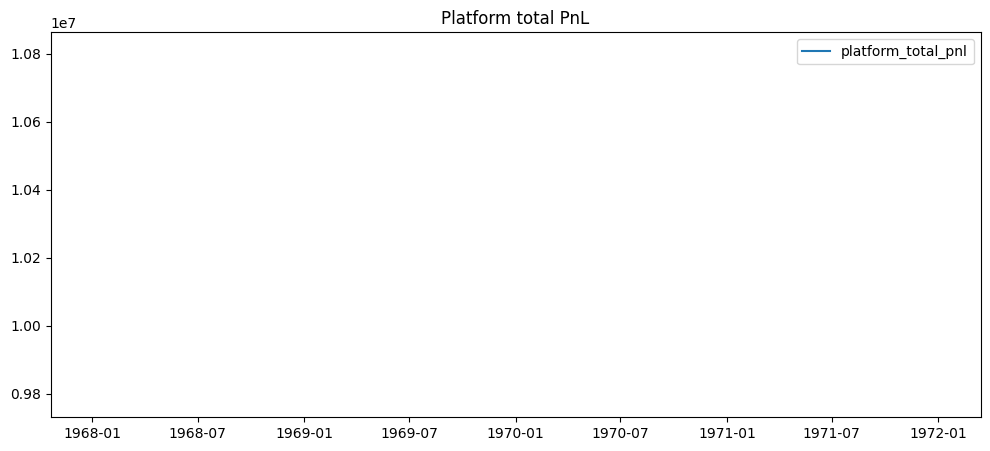

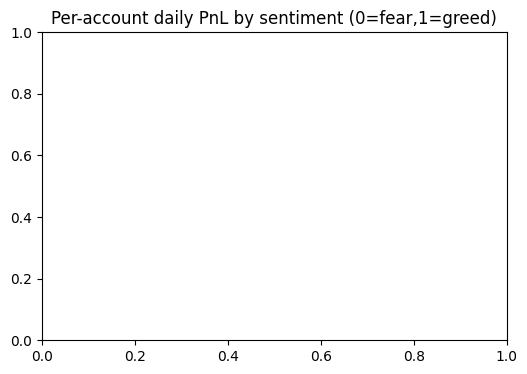

In [ ]:
import matplotlib.pyplot as plt

# Drop NaNs from daily_pnl
pnl_values = agg['daily_pnl'].dropna()

plt.figure(figsize=(8,5))
plt.hist(pnl_values, bins=50, edgecolor='black', alpha=0.7)

plt.title("Histogram of Per-Account Daily PnL")
plt.xlabel("Daily PnL")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [26]:
from scipy.stats import mannwhitneyu


if 'sentiment_simple' in agg.columns:
    grp0 = agg.loc[agg['sentiment_simple']==0,'daily_pnl'].dropna()
    grp1 = agg.loc[agg['sentiment_simple']==1,'daily_pnl'].dropna()
    if len(grp0)>0 and len(grp1)>0:
        stat, p = mannwhitneyu(grp0, grp1, alternative='two-sided')
        print('Mann-Whitney U test: stat=%.3f p=%.3f' % (stat,p))
    else:
        print('Not enough data for group test')
else:
    print('No sentiment_simple in aggregates')

if 'sentiment_index' in platform.columns and platform['sentiment_index'].notna().sum()>10:
    print('Pearson:', platform[['platform_total_pnl','sentiment_index']].dropna().corr().iloc[0,1])
else:
    print('Not enough numeric sentiment_index data for correlation')

Not enough data for group test
Not enough numeric sentiment_index data for correlation


In [31]:
events = []

if 'sentiment_index' in platform.columns and platform['sentiment_index'].notna().any():
    sidx = platform.copy()
    sidx['date'] = pd.to_datetime(sidx['date'])

    events = sidx.loc[sidx['sentiment_index']>=80,'date'] .tolist() + sidx.loc[sidx['sentiment_index']<=20,'date'].tolist()
elif 'sentiment_simple' in platform.columns and platform['sentiment_simple'].notna().any():

    events = pd.to_datetime(platform.loc[platform['sentiment_simple']==1,'date']).tolist()



import numpy as np
window = 7
event_windows = []
for e in events:
    for offset in range(-window, window+1):
        dt = (e + pd.Timedelta(days=offset)).strftime('%Y-%m-%d')
        val = platform.loc[pd.to_datetime(platform['date']).dt.strftime('%Y-%m-%d')==dt,'platform_total_pnl']
        if not val.empty:
            event_windows.append({'event_date': e.strftime('%Y-%m-%d'), 'offset': offset, 'pnl': val.values[0]})

In [33]:
model_df = merged.copy()
model_df['is_win'] = (model_df['Closed PnL']>0).astype(int)
features = []
if 'sentiment_index' in model_df.columns and model_df['sentiment_index'].notna().any():
    features += ['sentiment_index']
if 'Execution Price' in model_df.columns:
    features += ['Execution Price']
if 'Size USD' in model_df.columns:
    features += ['Size USD']


print("Features to be used for modeling:", features)



Features to be used for modeling: ['Execution Price', 'Size USD']
